# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Exploração de outras bases de dados** <br/>

**ENADE 2017**

Segundo matéria abaixo, os resultados do ENADE 2017 foram apresentados:

"Os resultados do Exame Nacional de Desempenho de Estudantes (Enade) de 2017 foram apresentados pelo Ministério da Educação e pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep), em 9 de outubro, em Brasília (DF), juntamente com um perfil dos participantes da edição.

...

Além dos resultados nas provas, o Enade, por meio do Questionário do Estudante, permite traçar o perfil dos concluintes avaliados. A informação, combinada ao desempenho na prova, pode ajudar na definição de políticas públicas e também guiar melhorias das próprias instituições e cursos." 

http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/mec-e-inep-divulgam-resultados-do-enade-2017-e-indicadores-de-qualidade-da-educacao-superior/21206

**Para aprofundar a ánalise dos dados, os micradados do exame serão analisados nesta disciplina.** Podem ser baixados no link abaixo. Usaremos o ano de 2017.

http://portal.inep.gov.br/web/guest/microdados


In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("datasets/MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2017.shape

(537436, 150)

In [2]:
enade2017.columns[0:]

Index(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO', 'CO_CURSO',
       'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO', 'CO_REGIAO_CURSO',
       ...
       'QE_I72', 'QE_I73', 'QE_I74', 'QE_I75', 'QE_I76', 'QE_I77', 'QE_I78',
       'QE_I79', 'QE_I80', 'QE_I81'],
      dtype='object', length=150)

In [3]:
'''
nota geral: 0-98 
questão08: Qual a renda total de sua família, incluindo seus rendimentos?
A = Até 1,5 salário mínimo (até R$ 1.405,50).
B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

i05 escolaridade da mae
A = Nenhuma.
B = Ensino fundamental: 1º ao 5º ano (1ª a 4ª série).
C = Ensino fundamental: 6º ao 9º ano (5ª a 8ª série).
D = Ensino médio.
E = Ensino Superior - Graduação.
F = Pós-graduação.

'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'CO_GRUPO', 'QE_I08', 'CO_IES', 'QE_I05', 'QE_I17'])
tabela.head(10)

,NT_GER,CO_GRUPO,QE_I08,CO_IES,QE_I05,QE_I17
0,"52,6",5710,B,1,F,B
1,"63,1",5710,B,1,D,A
2,"33,7",5710,F,1,F,B
3,"58,1",5710,B,1,D,A
4,"46,3",5710,F,1,F,B
5,"64,2",5710,C,1,B,A
6,"41,4",5710,C,1,D,A
7,"48,8",5710,C,1,E,B
8,"52,9",5710,E,1,F,A
9,"62,7",5710,C,1,D,B


In [4]:
##limpeza dos dados

#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')
print (tabela['NT_GER'])

#observe os NaN (not a number)

0         52.6
1         63.1
2         33.7
3         58.1
4         46.3
5         64.2
6         41.4
7         48.8
8         52.9
9         62.7
10        51.9
11        58.4
12        77.7
13        37.5
14        66.4
15        71.5
16        57.8
17        62.7
18        75.1
19        50.5
20        46.1
21        44.1
22        47.9
23        55.1
24        73.5
25        60.4
26        62.7
27        49.5
28        44.9
29        27.7
          ... 
537406     NaN
537407     NaN
537408     NaN
537409     NaN
537410     NaN
537411     NaN
537412     NaN
537413     NaN
537414     NaN
537415     NaN
537416     NaN
537417     NaN
537418     NaN
537419     NaN
537420     NaN
537421     NaN
537422     NaN
537423     NaN
537424     NaN
537425     NaN
537426     NaN
537427     NaN
537428     NaN
537429     NaN
537430     NaN
537431     NaN
537432     NaN
537433     NaN
537434     NaN
537435     NaN
Name: NT_GER, Length: 537436, dtype: object


In [5]:
'''No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela=tabela.loc[(tabela['NT_GER'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])
print(tabela['NT_GER'])
print(tabela['NT_GER'].mean())


0         52.6
1         63.1
2         33.7
3         58.1
4         46.3
5         64.2
6         41.4
7         48.8
8         52.9
9         62.7
10        51.9
11        58.4
12        77.7
13        37.5
14        66.4
15        71.5
16        57.8
17        62.7
18        75.1
19        50.5
20        46.1
21        44.1
22        47.9
23        55.1
24        73.5
25        60.4
26        62.7
27        49.5
28        44.9
29        27.7
          ... 
534887    43.8
534888    46.9
534890    48.2
534891    49.6
534892    63.2
534893    31.9
534895    71.5
534896    59.6
534897    15.1
534898    44.7
534900    30.8
534901    16.3
534902    66.3
534903    34.9
534904    71.9
534905    56.0
534906    45.9
534907    43.3
534908    68.4
534909    39.3
534910    69.6
534911    53.8
534912    15.2
534913    59.8
534914    42.7
534915    35.6
534916    66.1
534917    70.2
534918    51.9
534919    52.8
Name: NT_GER, Length: 449932, dtype: float64
43.52396851079471


In [6]:
tabela['NT_GER'].describe()

count    449932.000000
mean         43.523969
std          14.080110
min           0.000000
25%          33.400000
50%          42.900000
75%          53.100000
max          98.100000
Name: NT_GER, dtype: float64

In [7]:
#outros comandos
print('indice da primeira maior nota: ', tabela['NT_GER'].idxmax())
print('Maior nota: ', tabela['NT_GER'][72257])
#print(tabela['NT_GER'].idxmax())

indice da primeira maior nota:  72257
Maior nota:  98.1


In [8]:
#Calcula a média de um curso especifico
#Código da área de enquadramento do curso no Enade == ciencia da computacao

ccomp = tabela[tabela['CO_GRUPO']==4004]

print(ccomp)

        NT_GER  CO_GRUPO QE_I08  CO_IES QE_I05 QE_I17
383       58.7      4004      E       1      F      A
384       49.8      4004      C       1      C      A
386       40.1      4004      C       1      D      A
387       53.2      4004      B       1      B      A
388       52.4      4004      B       1      F      B
389       22.4      4004      F       1      D      E
390       53.3      4004      E       1      D      B
391       44.4      4004      B       1      D      A
392       66.0      4004      D       1      C      A
393       36.5      4004      B       1      E      B
394       32.1      4004      D       1      E      A
395       23.0      4004      E       1      F      B
396       55.8      4004      F       1      F      D
397       35.5      4004      D       1      B      A
398       39.5      4004      B       1      D      A
399       68.3      4004      D       1      D      B
400       46.5      4004      C       1      D      B
401       39.1      4004    

In [9]:
ccomp['NT_GER'].describe()

count    8489.000000
mean       43.262775
std        13.633212
min         0.000000
25%        33.700000
50%        42.300000
75%        52.400000
max        95.100000
Name: NT_GER, dtype: float64

In [10]:
#do curso do IFNMG
ifccomp = ccomp[ccomp['CO_IES']==3188]
ifccomp.describe()

,NT_GER,CO_GRUPO,CO_IES
count,6.000000,6.0,6.0
mean,52.883333,4004.0,3188.0
std,8.564442,0.0,0.0
min,40.300000,4004.0,3188.0
25%,48.325000,4004.0,3188.0
50%,53.450000,4004.0,3188.0
75%,58.875000,4004.0,3188.0
max,62.800000,4004.0,3188.0


In [11]:
#somente as notas de quem respondeu a questão sobre a renda
ccomp=ccomp.loc[(ccomp['QE_I08'].notnull())]
ccomp.NT_GER.describe()

count    8408.000000
mean       43.324619
std        13.626419
min         0.000000
25%        33.800000
50%        42.300000
75%        52.500000
max        95.100000
Name: NT_GER, dtype: float64

In [12]:
ccomp=ccomp.loc[(ccomp['QE_I05'].notnull())]
ccomp.NT_GER.describe()

count    8408.000000
mean       43.324619
std        13.626419
min         0.000000
25%        33.800000
50%        42.300000
75%        52.500000
max        95.100000
Name: NT_GER, dtype: float64

In [13]:
ccomp.QE_I08.head(10)

ccomp['QE_I08'] = ccomp['QE_I08'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6,'G':7})

ccomp.QE_I08.head(10)

383    5
384    3
386    3
387    2
388    2
389    6
390    5
391    2
392    4
393    2
Name: QE_I08, dtype: int64

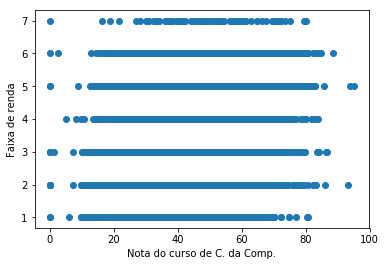

In [14]:
import matplotlib.pyplot as plt
#visualmente
plt.scatter( ccomp.NT_GER, ccomp.QE_I08)
plt.ylabel('Faixa de renda')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()

In [15]:
ccomp.QE_I05 = ccomp['QE_I05'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})

ccomp.QE_I05.head(10)

383    6
384    3
386    4
387    2
388    6
389    4
390    4
391    4
392    3
393    5
Name: QE_I05, dtype: int64

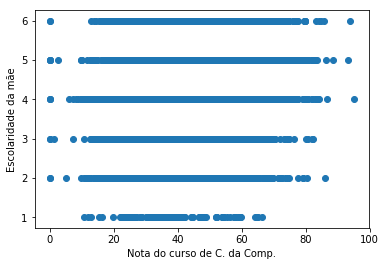

In [16]:
#visualmente
plt.scatter( ccomp.NT_GER, ccomp.QE_I05)
plt.ylabel('Escolaridade da mãe')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()


In [17]:
escolaridade = ccomp.loc[ccomp.QE_I05 ==1]
escolaridade.NT_GER.describe()

count    112.000000
mean      38.037500
std       12.315676
min       10.700000
25%       30.725000
50%       36.000000
75%       46.600000
max       66.300000
Name: NT_GER, dtype: float64

**Links utilizados:**

http://portal.inep.gov.br/artigo/-/asset_publisher/B4AQV9zFY7Bv/content/mec-e-inep-divulgam-resultados-do-enade-2017-e-indicadores-de-qualidade-da-educacao-superior/21206

http://portal.inep.gov.br/web/guest/microdados

https://paulovasconcellos.com.br/28-comandos-%C3%BAteis-de-pandas-que-talvez-voc%C3%AA-n%C3%A3o-conhe%C3%A7a-6ab64beefa93

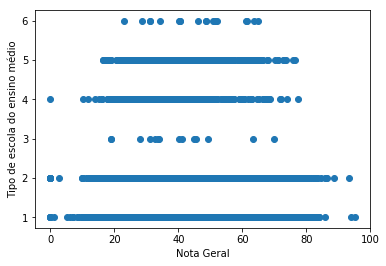

In [18]:
# Verificar o impacto do ensino médio no ensino superior
"""
A = Todo em escola pública.
B = Todo em escola privada (particular).
C = Todo no exterior.
D = A maior parte em escola pública.
E = A maior parte em escola privada (particular).
F = Parte no Brasil e parte no exterior.
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
ccomp['QE_I17'] = ccomp['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
ccomp=ccomp.loc[(ccomp['QE_I17'].notnull())]
plt.scatter( ccomp.NT_GER, ccomp.QE_I17 )
plt.xlabel('Nota Geral')
plt.ylabel('Tipo de escola do ensino médio')
plt.show()
